In [134]:
#Grab Data
import numpy as np
import pandas as pd
import sys, os
import math


trainDataDir = r"C:\Users\Marco\Desktop\CS6375\NewHW3\heart_train.data"
testDataDir = r"C:\Users\Marco\Desktop\CS6375\NewHW3\heart_test.data"
col_names = ['y','x1','x2','x3','x4','x5','x6','x7','x8','x9','x10','x11','x12','x13','x14','x15','x16','x17','x18','x19','x20','x21','x22']
trainData =  pd.read_csv(trainDataDir, sep="," , names = col_names)
testData = pd.read_csv(testDataDir, sep="," , names = col_names)
#print(trainData)
#print(testData)

In [135]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics


Y = trainData['y'].values
Ytest=testData['y'].values
#Y = Y.reshape(-1,1)
print('Y dimention: ',Y.shape)
print('Ytest dimention: ',Ytest.shape)
X = trainData[['x1','x2','x3','x4','x5','x6','x7','x8','x9','x10','x11','x12','x13','x14','x15','x16','x17','x18','x19','x20','x21','x22']].values
Xtest = testData[['x1','x2','x3','x4','x5','x6','x7','x8','x9','x10','x11','x12','x13','x14','x15','x16','x17','x18','x19','x20','x21','x22']].values
print('X dimnetion: ',X.shape)
print('Xtest dimnetion: ',Xtest.shape)

Y dimention:  (80,)
Ytest dimention:  (187,)
X dimnetion:  (80, 22)
Xtest dimnetion:  (187, 22)


Average Training error in iteration  1  is  0.16250000000000003 with alphaT = 0.8198716309647145
Average Training error in iteration  2  is  0.264638346727899 with alphaT = 0.5109991294500428
Average Training error in iteration  3  is  0.37845721126898896 with alphaT = 0.24805086888799385
Average Training error in iteration  4  is  0.36552749587899086 with alphaT = 0.27572622350668535
Average Training error in iteration  5  is  0.3907362386437335 with alphaT = 0.22210926437147055


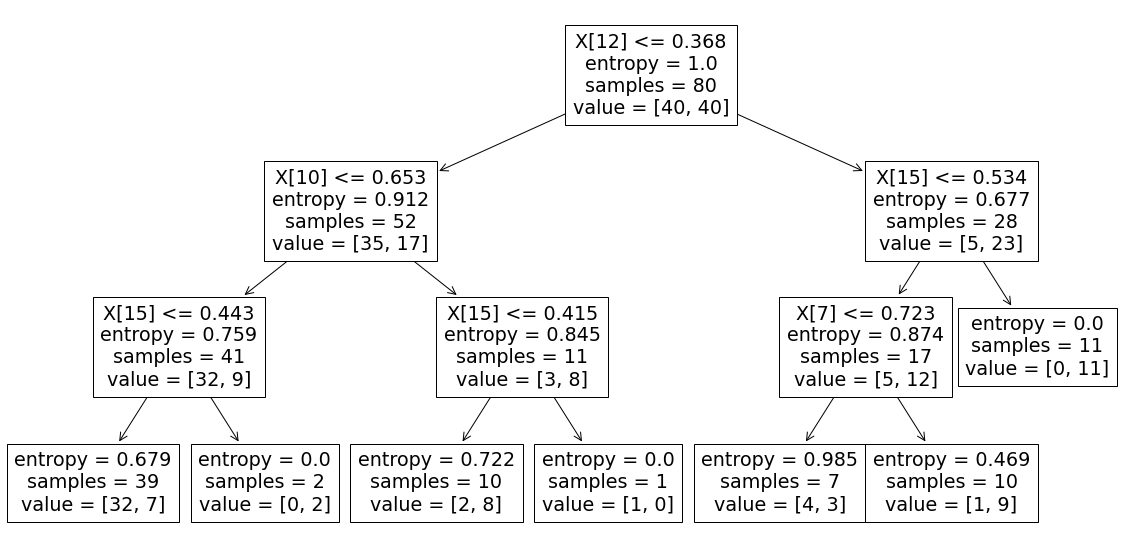

In [136]:
decisionTree = DecisionTreeClassifier(criterion='entropy',max_depth = 3, splitter='random')
decisionTree.fit(X,Y)
plt.figure(figsize=[20,10])
tree.plot_tree(decisionTree)

adaBoost = AdaBoostClassifier(base_estimator = decisionTree,
                             algorithm = 'SAMME',n_estimators = 5)

adaBoost.fit(X,Y)

AvgtrainErr = adaBoost.estimator_errors_
idx=0
for Err in AvgtrainErr:
    idx= idx + 1
    alpha = 0.5*math.log( (1-Err) /Err)
    print("Average Training error in iteration ",idx ," is ",Err, "with alphaT =", alpha)


During iteration 1 accuracy was  0.6149732620320856
During iteration 2 accuracy was  0.6149732620320856
During iteration 3 accuracy was  0.7112299465240641
During iteration 4 accuracy was  0.6417112299465241
During iteration 5 accuracy was  0.6417112299465241


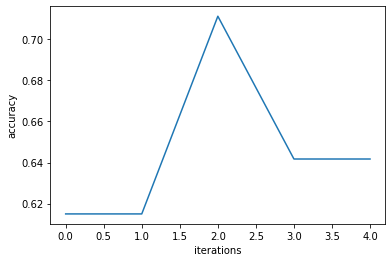

In [146]:
acc = [0]*5
for idx in range(5):
    adaBoost = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(criterion='entropy',max_depth = 1, splitter='random'),
                             algorithm = 'SAMME',n_estimators = idx+1)
    adaBoost.fit(X,Y)
    #adaBoost.predict(Xtest)
    acc[idx] = adaBoost.score(Xtest,Ytest)
    print("During iteration", idx+1, "accuracy was ", acc[idx])
import matplotlib.pyplot as plt
plt.plot(range(5),acc)
plt.xlabel('iterations')
plt.ylabel('accuracy')
plt.show()